## CMPE 462 HOMEWORK 1
Due Date: 21.03.2019

In [1]:
# Allowed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# For loading data, you can import other libraries, but further usage is not allowed.

### 1.) Review bias/variance dilemma.
Replicate the bias-variance-plot (bias,
variance and error vs. model complexity) given in Figure 4.6 in the textbook
or in lecture notes [W04.pdf, pg.52]. For this:

* Generate 20 values {$x^t$} from the range [0, 5] from uniform distribution.  
* Generate 100 different samples $X_s$. Each sample contains 20 instances {$x^t, y^t_s$} where $y^t_s = f(x^t) + \epsilon$, $f(x) =2× sin(1.5 × x)$, and $ \epsilon ∼ N (0, 1)$.
* For each sample, fit polynomial models of order 1,3, and 5.
* Plot bias, variance and error of these models.

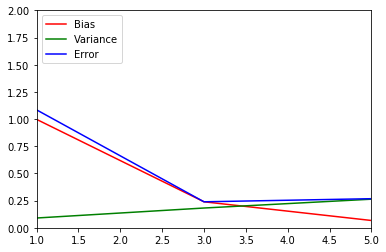

In [2]:
# Solution Here

#Generate 20 values in range 0-5
x = np.random.uniform(0,5,20)

#Calculate f
f = np.arange(20.0)
for i in range(20):
    f[i] = 2*np.sin(1.5*x[i])
    

#Store the outputs of polynomial fits to the 100 samples
g1Store = np.zeros((100,20))
g3Store = np.zeros((100,20))
g5Store = np.zeros((100,20))


#Fit polynomial models and store the output
for i in range(100):
    y = np.arange(20.0)
    noise = np.random.normal(0,1,20)
    for j in range(20):
        y[j] = f[j] + noise[j]
    
    g1 = np.poly1d(np.polyfit(x,y,1))
    g3 = np.poly1d(np.polyfit(x,y,3))
    g5 = np.poly1d(np.polyfit(x,y,5))
    
    g1Store[i] = g1(x)
    g3Store[i] = g3(x)
    g5Store[i] = g5(x)
    
#Calculate means of each instance over 100 samples
g1Mean = np.mean(g1Store,axis = 0)
g3Mean = np.mean(g3Store,axis = 0)
g5Mean = np.mean(g5Store,axis = 0)

#Calculate bias
bias1Sum, bias3Sum, bias5Sum = 0,0,0 
for i in range(20):
    bias1Sum += (g1Mean[i] - f[i])**2
    bias3Sum += (g3Mean[i] - f[i])**2
    bias5Sum += (g5Mean[i] - f[i])**2
    
bias1 = np.sqrt(bias1Sum/20)
bias3 = np.sqrt(bias3Sum/20)
bias5 = np.sqrt(bias5Sum/20)

#Calculate variance
varSum1, varSum3, varSum5 = 0,0,0
for i in range(100):
    for j in range(20):
        varSum1 += (g1Store[i][j] - g1Mean[j])**2
        varSum3 += (g3Store[i][j] - g3Mean[j])**2
        varSum5 += (g5Store[i][j] - g5Mean[j])**2

var1 = varSum1 / (20*100)
var3 = varSum3 / (20*100)
var5 = varSum5 / (20*100)

#Calculate error
error1 = bias1**2 + var1
error3 = bias3**2 + var3
error5 = bias5**2 + var5

bias = [bias1,bias3,bias5]
var = [var1,var3,var5]
error = [error1,error3,error5]

x = np.array([1,3,5])


#plt.plot(x,bias,'-r',label = 'Bias',x,var,'-g',label = 'Variance',x,error,'-b',label = 'Error')
plt.plot(x,bias,'-r',label = 'Bias')
plt.plot(x,var,'-g',label = 'Variance')
plt.plot(x,error,'-b',label = 'Error')
plt.legend(loc='upper left')
plt.axis([1,5,0,2])
plt.show()

### 2.) Review cross-validation.
Replicate the cross-validation error plot (training and validation error vs. model complexity plot) given in Figure 4.7 in the textbook or in lecture notes [W04.pdf, pg52]. For this:
* Generate 10 samples containing 100 instances as in part 1.
* Split each sample to training and validation sets, fit polynomial models of order 1,3, and 5.
* Plot mean training and validation error (mean square error) of each model.

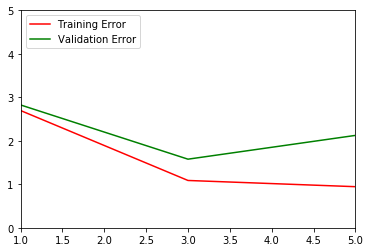

In [4]:
# Solution Here

x = np.random.uniform(0,5,100)
f = np.arange(100.0)
for i in range(100):
    f[i] = 2*np.sin(1.5*x[i])

# Store training errors
e1Store = np.zeros((10,50))
e3Store = np.zeros((10,50))
e5Store = np.zeros((10,50))

# Create global variables for polynomial functions
p1 = np.poly1d([1,1])
p3 = np.poly1d([1,1,1,1])
p5 = np.poly1d([1,1,1,1,1,1])

# Split the dataset into 2
trainX, validX = np.split(x,2)
trainF, validF = np.split(f,2)

# Fit polynomial models and calculate training error
for i in range(10):
    y = np.arange(50.0)
    noise = np.random.normal(0,1,50)
    for j in range(50):
        y[j] = trainF[j] + noise[j]
    
    p1 = np.poly1d(np.polyfit(trainX,y,1))
    p3 = np.poly1d(np.polyfit(trainX,y,3))
    p5 = np.poly1d(np.polyfit(trainX,y,5))
    
    e1Store[i] = (p1(trainX) - y)**2
    e3Store[i] = (p3(trainX) - y)**2
    e5Store[i] = (p5(trainX) - y)**2

# Calculate the training error
e1Mean = np.mean(e1Store,axis = 0)
e3Mean = np.mean(e3Store,axis = 0)
e5Mean = np.mean(e5Store,axis = 0)

tError1 = np.mean(e1Mean)
tError3 = np.mean(e3Mean)
tError5 = np.mean(e5Mean)

tError = [tError1,tError3,tError5]

# Store validation set errors
v1Store = np.zeros((10,50))
v3Store = np.zeros((10,50))
v5Store = np.zeros((10,50))

# Calculate outputs of validation set and calculate validation error
for i in range(10):
    validY = np.arange(50.0)
    noise = np.random.normal(0,1,50)
    for j in range(50):
        validY[j] = validF[j] + noise[j]
        
    v1Store[i] = (p1(validX) - validY)**2
    v3Store[i] = (p3(validX) - validY)**2
    v5Store[i] = (p5(validX) - validY)**2

# Calculate validation set errors
v1Mean = np.mean(v1Store,axis = 0)
v3Mean = np.mean(v3Store,axis = 0)
v5Mean = np.mean(v5Store,axis = 0)

vError1 = np.mean(v1Mean)
vError3 = np.mean(v3Mean)
vError5 = np.mean(v5Mean)

vError = [vError1,vError3,vError5]

x = np.array([1,3,5])

# RED LINE IS TRAINING ERROR, GREEN LINE IS VALIDATION ERROR

#plt.plot(x,tError,'-r',x,vError,'-g')
plt.plot(x,tError,'-r',label = 'Training Error')
plt.plot(x,vError,'-g',label = 'Validation Error')
plt.legend(loc='upper left')
plt.axis([1,5,0,5])
plt.show()

### 3.) Use of real dataset. 
Download Iris Data Set from UCI Machine Learning Repository. Randomly split it into training and test sets.
* For each feature, plot histogram of classes. For better visualiziation, plot classes in same plot but with different colors. (For this you can use plt.subplots)
* Consider only two classes: Iris Setosa and Iris Versicolour.
* Assuming Gaussian distribution, apply parametric classification, and find which particular feature (sepal length, sepal width, petal length, petal width) is most successful in classifying instances.
    - For this, treat each feature separately. find maximum likelihood estimate of the parameters $(μ, σ^2)$ of different classes using training set. (You can use plt.errorbar for visualization, use one column for each feature and visualize both classes in same plot using different colors).
    - Using these parameters, predict the classes of the instances in the test set, and calculate the error.

In [5]:
# Solution Here

# Load the data and put labels each feature
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
dataset = pd.read_csv('/home/tony/Desktop/cmpe462/hw1/iris.csv',names=names)

# Divide the dataset according to the classes
setosa=dataset[dataset['Species']=='Iris-setosa']
versicolor =dataset[dataset['Species']=='Iris-versicolor']
virginica =dataset[dataset['Species']=='Iris-virginica']

<Figure size 432x288 with 0 Axes>

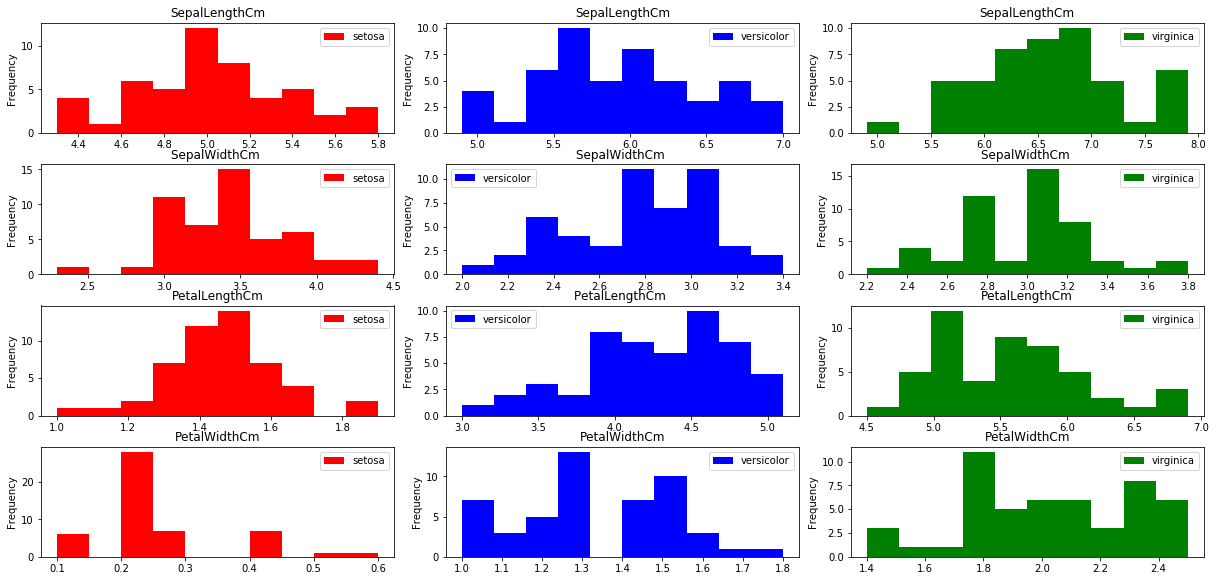

In [6]:
# Plot the dataset

plt.figure()

fig,ax=plt.subplots(4,3,figsize=(17, 8))
setosa["SepalLength"].plot(kind="hist", ax=ax[0][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalLength"].plot(kind="hist", ax=ax[0][1],label="versicolor",color='b',fontsize=10)
virginica["SepalLength"].plot( kind="hist",ax=ax[0][2],label="virginica",color='g',fontsize=10)

setosa["SepalWidth"].plot(kind="hist", ax=ax[1][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalWidth"].plot(kind="hist", ax=ax[1][1],label="versicolor",color='b',fontsize=10)
virginica["SepalWidth"].plot( kind="hist",ax=ax[1][2],label="virginica",color='g',fontsize=10)

setosa["PetalLength"].plot(kind="hist", ax=ax[2][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalLength"].plot(kind="hist", ax=ax[2][1],label="versicolor",color='b',fontsize=10)
virginica["PetalLength"].plot( kind="hist",ax=ax[2][2],label="virginica",color='g',fontsize=10)


setosa["PetalWidth"].plot(kind="hist", ax=ax[3][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalWidth"].plot(kind="hist", ax=ax[3][1],label="versicolor",color='b',fontsize=10)
virginica["PetalWidth"].plot( kind="hist",ax=ax[3][2],label="virginica",color='g',fontsize=10)

plt.rcParams.update({'font.size': 10})
plt.tight_layout()

ax[0][0].set(title='SepalLengthCm')
ax[0][1].set(title='SepalLengthCm')
ax[0][2].set(title='SepalLengthCm')
ax[1][0].set(title='SepalWidthCm ')
ax[1][1].set(title='SepalWidthCm ')
ax[1][2].set(title='SepalWidthCm ')
ax[2][0].set(title='PetalLengthCm')
ax[2][1].set(title='PetalLengthCm ')
ax[2][2].set(title='PetalLengthCm')
ax[3][0].set(title='PetalWidthCm')
ax[3][1].set(title='PetalWidthCm')
ax[3][2].set(title='PetalWidthCm')

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()
ax[2][0].legend()
ax[2][1].legend()
ax[2][2].legend()
ax[3][0].legend()
ax[3][1].legend()
ax[3][2].legend()


plt.show()

In [7]:
array = dataset.values

# Split the dataset into training and validation sets: 50/50
trainSetosa = array[0:25]
trainVersicolor = array[50:75]

validSetosa = array[25:50]
validVersicolor = array[75:100]

trainSetX = trainSetosa[:,0:4]
trainVerX = trainVersicolor[:,0:4]
validSetX = validSetosa[:,0:4]
validVerX = validVersicolor[:,0:4]

#MEAN AND VARIANCES OF FEATURES PER CLASS

#Sepal Length
meanSetSL = np.mean(trainSetX[:,0])
stdSetSL = np.std(trainSetX[:,0])

meanVerSL = np.mean(trainVerX[:,0])
stdVerSL = np.std(trainVerX[:,0])

#Sepal Width
meanSetSW = np.mean(trainSetX[:,1])
stdSetSW = np.std(trainSetX[:,1])

meanVerSW = np.mean(trainVerX[:,1])
stdVerSW = np.std(trainVerX[:,1])

#Petal Length
meanSetPL = np.mean(trainSetX[:,2])
stdSetPL = np.std(trainSetX[:,2])

meanVerPL = np.mean(trainVerX[:,2])
stdVerPL = np.std(trainVerX[:,2])

#Petal Width
meanSetPW = np.mean(trainSetX[:,3])
stdSetPW = np.std(trainSetX[:,3])

meanVerPW = np.mean(trainVerX[:,3])
stdVerPW = np.std(trainVerX[:,3])


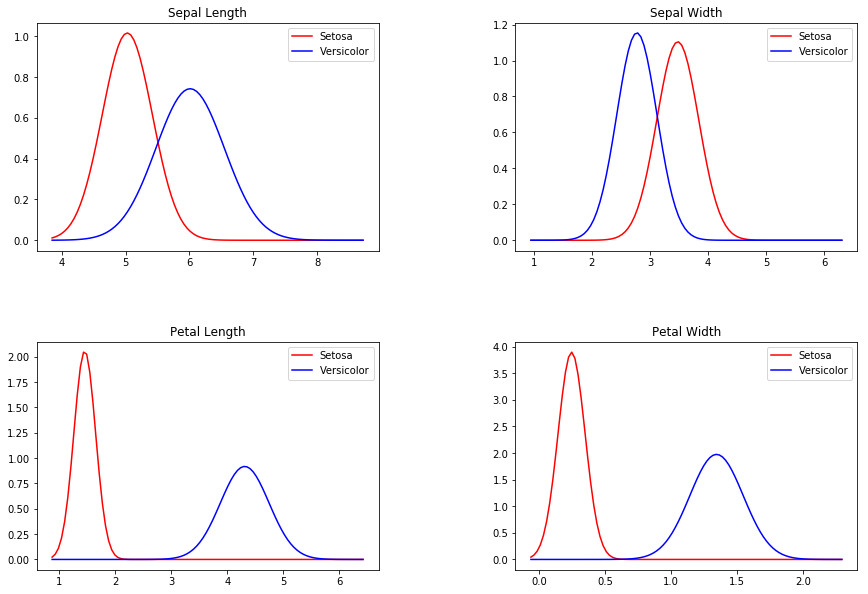

In [8]:
# Plot the gaussian distributions of features according the mean and variances which are calculated above

def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4,left =0.1,right = 2, top = 2 , bottom = 0.1)

x1 = np.linspace(-3*stdSetSL+meanSetSL,+3*stdSetSL+1.5*meanSetSL,100)
ax = plt.subplot(2, 2, 1)
#plt.plot(x1, stats.norm.pdf(x1, meanSetSL, stdSetSL),'r',x1,stats.norm.pdf(x1,meanVerSL,stdVerSL))
plt.plot(x1, gaussian(x1, meanSetSL, stdSetSL),'r',label = 'Setosa')
plt.plot(x1,gaussian(x1,meanVerSL,stdVerSL),'b',label = 'Versicolor')
plt.legend(loc='upper right')
ax.set_title("Sepal Length")

x2 = np.linspace(-7*stdSetSW+meanSetSW,+3*stdSetSW+1.5*meanSetSW,100)
ax = plt.subplot(2, 2, 2)
#plt.plot(x2, stats.norm.pdf(x2, meanSetSW, stdSetSW),'r',x2,stats.norm.pdf(x2,meanVerSW,stdVerSW))
plt.plot(x2, gaussian(x2, meanSetSW, stdSetSW),'r',label = 'Setosa')
plt.plot(x2,gaussian(x2,meanVerSW,stdVerSW),'b',label = 'Versicolor')
plt.legend(loc='upper right')
ax.set_title("Sepal Width")

x3 = np.linspace(-3*stdSetPL+meanSetPL,+3*stdSetPL+4*meanSetPL,100)
ax = plt.subplot(2, 2, 3)
#plt.plot(x3, stats.norm.pdf(x3, meanSetPL, stdSetPL),'r',x3,stats.norm.pdf(x3,meanVerPL,stdVerPL))
plt.plot(x3, gaussian(x3, meanSetPL, stdSetPL),'r',label = 'Setosa')
plt.plot(x3,gaussian(x3,meanVerPL,stdVerPL),'b',label = 'Versicolor')
plt.legend(loc='upper right')
ax.set_title("Petal Length")

x4 = np.linspace(-3*stdSetPW+meanSetPW,+3*stdSetPW+8*meanSetPW,100)
ax = plt.subplot(2, 2, 4)
#plt.plot(x4, stats.norm.pdf(x4, meanSetPW, stdSetPW),'r',x4,stats.norm.pdf(x4,meanVerPW,stdVerPW))
plt.plot(x4, gaussian(x4, meanSetPW, stdSetPW),'r',label = 'Setosa')
plt.plot(x4,gaussian(x4,meanVerPW,stdVerPW),'b',label = 'Versicolor')
plt.legend(loc='upper right')

ax.set_title("Petal Width")

plt.show()

In [9]:
# Calculate the threshold points to discriminate 2 classes
# according to the means and variances of the feature per class
def thresholds(mean1,std1,mean2,std2):
    a = 2*std1**2-2*std2**2
    b = 4*(std2**2)*mean1-4*(std1**2)*mean2
    c = 2*(std1**2)*mean2**2 - 2*(std2**2)*mean1**2 - 4*(std1**2)*(std2**2)*(np.log(std1)-np.log(std2))
    x1 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    x2 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
    return [x1,x2] if x1 < x2 else [x2,x1]

# Thresholds for 4 features
[sl1,sl2] = thresholds(meanSetSL,stdSetSL,meanVerSL,stdVerSL)
[sw1,sw2] = thresholds(meanSetSW,stdSetSW,meanVerSW,stdVerSW)
[pl1,pl2] = thresholds(meanSetPL,stdSetPL,meanVerPL,stdVerPL)
[pw1,pw2] = thresholds(meanSetPW,stdSetPW,meanVerPW,stdVerPW)

print(sl1,sl2)
print(sw1,sw2)
print(pl1,pl2)
print(pw1,pw2)

2.2888386520001807 5.509239059561193
-12.895749664187669 3.1280528711847055
-0.8593647121498386 2.3633072433140057
-0.8909816429421379 0.6293673120675337


In [10]:
# Calculate number of data points from test set which are predicted wrong
errorSL,errorSW,errorPL,errorPW = 0,0,0,0

for data in validSetX:
    if (data[0] < sl1 or data[0] > sl2):
        errorSL += 1
    if (data[1] > sw1 and data[1] < sw2):
        errorSW += 1
    if (data[2] < pl1 or data[2] > pl2):
        errorPL +=  1
    if (data[3] < pw1 or data[3] > pw2):
        errorPW +=  1
        
for data in validVerX:
    if (data[0] > sl1 and data[0] < sl2):
        errorSL +=  1
    if (data[1] < sw1 or data[1] > sw2):
        errorSW +=  1
    if (data[2] > pl1 and data[2] < pl2):
        errorPL += 1
    if (data[3] > pw1 and data[3] < pw2):
        errorPW += 1

    
print("Error of Sepal Length:",errorSL/50)
print("Error of Sepal Width: ",errorSW/50)
print("Error of Petal Length:",errorPL/50)
print("Error of Petal Width: ",errorPW/50)

Error of Sepal Length: 0.14
Error of Sepal Width:  0.16
Error of Petal Length: 0.0
Error of Petal Width:  0.0


### 3.) Results. 
 I split the dataset into training and test sets equally. Threshold points are calculated for each feature of a class using the means and variances of features. Then errors are calculated using these threshold points on test set. According to the results Petal Length and Petal Width are the features which has zero error on test set. Therefore they are the best features in classifying instances. The gaussian distribution of the features are also plotted and it can be seen that these 2 features distinguishes the classes better than other 2.